# THIS PROJECT CREATED BY :
EL KORCHI MOHAMED 
LABHALLA KAHLID
BOULLOUL EL MEHDI

# SUPERVISED BY :
MR. ABDERRAHMANE ESSADIQ

# THIS PROJECT ABOUT ETL(EXTRACT,TRANSFORM,LOAD) AND MAKE DECISION USING PYTHON 

In [127]:
from TwitterAPI import TwitterAPI, TwitterOAuth, TwitterRequestError, TwitterConnectionError, TwitterPager
import pandas as pd
import tweepy
import time
import twython
import csv
import ssl
import re
from wordcloud import WordCloud
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [2]:
consumer_key= "ZCv6Qwirj21KKN6uQyrEstRmm"
consumer_secret= "L2pQRqN1scd6fDUH7GeRs4UJjc0DqaA03tXUjdQ1jn5AXkRda9"
access_token_key= "1540373260734529541-GZDGXZ4Vm6mgwGQRnHH2IcrrVWyPrm"
access_token_secret= "ls2PVQ8rUNebKdF4ow4rpt5UPsK16L6HPXBOlHFqTMCS4"

In [173]:
authenticate= tweepy.OAuthHandler(consumer_key,consumer_secret)
authenticate.set_access_token(access_token_key,access_token_secret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)
searchTheme="#Mercedes -is:retweets"
ssl._create_default_https_context = ssl._create_unverified_context

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)
api1 = tweepy.API(auth)
##api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [194]:

#def get_new_tweets():
print("Retrieving tweets")
corpus = []                                                                                        
tweets=tweepy.Cursor(api.search_tweets,q="#Mercedes",lang="en",tweet_mode="extended").items(3000)        
time.sleep(4)
corpus.extend(tweets)                                                                          
data_tweets = [[tweet.id_str, tweet.user.screen_name, tweet.full_text, tweet.created_at,tweet.favorite_count,tweet.retweet_count,tweet.in_reply_to_status_id_str,tweet.author.id_str] for tweet in corpus]
data_user = [[ tweet.author.id_str,tweet.user.screen_name,tweet.author.location,tweet.author.verified,tweet.author.name,tweet.author.created_at,tweet.author.followers_count,tweet.author.friends_count,tweet.author.description] for tweet in corpus]
tweets = pd.DataFrame(data_tweets, columns=['tweet_id', 'screen_name', 'text', 'creation date','favotits_count','retweet_count','in_reply_to_status_id_str','user id'])    
user_data=pd.DataFrame(data_user,columns=['user id','screen_name','location','is_verified','user name','account creation','followers_count','friends_count','description'])   

# VIEW THE DATAFRAME HEAD WITH THE TWEETS RETRIEVED
tweets.head()
user_data.drop_duplicates(subset ="user id",
                     keep = False, inplace = True)
user_data.head()
user_data.to_csv("users.csv")





Retrieving tweets


In [ ]:
#get all replies on each tweet
replies=[]
print("get replies 1")
for indice in tweets.index:
    for tweet in tweepy.Cursor(api1.search_tweets,q='to:'+tweets['screen_name'][indice]).items(100):
        if hasattr(tweet, 'in_reply_to_status_id_str'):
            if (tweet.in_reply_to_status_id_str==tweets['tweet_id'][indice]):
                replies.append(tweet)


with open('replies_clean.csv', 'w') as f:
    csv_writer = csv.DictWriter(f, fieldnames=('user', 'text'))
    csv_writer.writeheader()
    for tweet in replies:
        row = {'user': tweet.user.screen_name, 'text':tweet.text.replace('\n', ' ')}
        csv_writer.writerow(row)

In [195]:
# clean all tweet 

def clean_text(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#+','',text)
    text=re.sub(r'\n+','',text)
    text=re.sub(r'RT:[\s]+','',text)
    text=re.sub(r'https:\/\/\s+','',text)
    text=re.sub(r';+','',text)

    return text


tweets['text']=tweets['text'].apply(clean_text)

#tweets.to_csv("tweets.csv")
tweets.head()


,tweet_id,screen_name,text,creation date,favotits_count,retweet_count,in_reply_to_status_id_str,user id
0,1545186350911000576,biscolf,RT : And that’s why they call it Magic City✨ A...,2022-07-07 23:21:48+00:00,0,37,None,193774022
1,1545185288254722048,mystery2no1,RT : 2012/62 Mercedes Benz SLK55 V8 2dr Conver...,2022-07-07 23:17:35+00:00,0,1,None,1389120063907586049
2,1545178231074336768,sulfaj_,RT : New helmet design of George Russell for t...,2022-07-07 22:49:32+00:00,0,4,None,199263855
3,1545173194205716490,motemotorco,RT : Mercedes to use Sila’s silicon anode chem...,2022-07-07 22:29:32+00:00,0,1,None,27835278
4,1545171062211522560,dfwautoclub,😎White Maybach S680 4-Matic filmed with Ray-Ba...,2022-07-07 22:21:03+00:00,0,0,None,39766452


In [196]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity    
    
tweets['subjectivity']=tweets['text'].apply(getSubjectivity)
tweets['polarity']=tweets['text'].apply(getPolarity)
tweets


,tweet_id,screen_name,text,creation date,favotits_count,retweet_count,in_reply_to_status_id_str,user id,subjectivity,polarity
0,1545186350911000576,biscolf,RT : And that’s why they call it Magic City✨ A...,2022-07-07 23:21:48+00:00,0,37,None,193774022,0.745833,0.487500
1,1545185288254722048,mystery2no1,RT : 2012/62 Mercedes Benz SLK55 V8 2dr Conver...,2022-07-07 23:17:35+00:00,0,1,None,1389120063907586049,0.494444,0.077778
2,1545178231074336768,sulfaj_,RT : New helmet design of George Russell for t...,2022-07-07 22:49:32+00:00,0,4,None,199263855,0.207071,-0.010101
3,1545173194205716490,motemotorco,RT : Mercedes to use Sila’s silicon anode chem...,2022-07-07 22:29:32+00:00,0,1,None,27835278,0.000000,0.000000
4,1545171062211522560,dfwautoclub,😎White Maybach S680 4-Matic filmed with Ray-Ba...,2022-07-07 22:21:03+00:00,0,0,None,39766452,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1000,1543870498555465728,autosmotosnet,MERCEDES-BENZ GLA180 - 2021 - 40765 km. for mo...,2022-07-04 08:13:05+00:00,0,0,None,737099436,0.500000,0.500000
1001,1543869292726439936,autosmotosnet,MERCEDES-BENZ R 320 CDI 4 MATIC - 2006 - 20176...,2022-07-04 08:08:17+00:00,0,0,None,737099436,0.500000,0.500000
1002,1543868831256526850,Lemfaou,"RT _stx: Summer Mercedes from Fire Emblem, com...",2022-07-04 08:06:27+00:00,0,856,None,1126589124419497984,0.000000,0.000000
1003,1543867480376070149,Gary8Primus,"RT _stx: Summer Mercedes from Fire Emblem, com...",2022-07-04 08:01:05+00:00,0,856,None,1085276925344518145,0.000000,0.000000


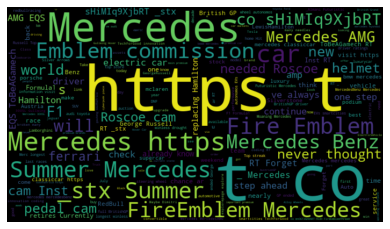

In [197]:
all_words=''.join([twts for twts in tweets['text']])
word_Cloud=WordCloud(width=700,height=400,random_state=40,max_font_size=119).generate(all_words)

plt.imshow(word_Cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [198]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neural'
    else :
        return 'Positive' 

tweets['Analyse']= tweets['polarity'].apply(getAnalysis)

tweets

,tweet_id,screen_name,text,creation date,favotits_count,retweet_count,in_reply_to_status_id_str,user id,subjectivity,polarity,Analyse
0,1545186350911000576,biscolf,RT : And that’s why they call it Magic City✨ A...,2022-07-07 23:21:48+00:00,0,37,None,193774022,0.745833,0.487500,Positive
1,1545185288254722048,mystery2no1,RT : 2012/62 Mercedes Benz SLK55 V8 2dr Conver...,2022-07-07 23:17:35+00:00,0,1,None,1389120063907586049,0.494444,0.077778,Positive
2,1545178231074336768,sulfaj_,RT : New helmet design of George Russell for t...,2022-07-07 22:49:32+00:00,0,4,None,199263855,0.207071,-0.010101,Negative
3,1545173194205716490,motemotorco,RT : Mercedes to use Sila’s silicon anode chem...,2022-07-07 22:29:32+00:00,0,1,None,27835278,0.000000,0.000000,Neural
4,1545171062211522560,dfwautoclub,😎White Maybach S680 4-Matic filmed with Ray-Ba...,2022-07-07 22:21:03+00:00,0,0,None,39766452,0.000000,0.000000,Neural
...,...,...,...,...,...,...,...,...,...,...,...
1000,1543870498555465728,autosmotosnet,MERCEDES-BENZ GLA180 - 2021 - 40765 km. for mo...,2022-07-04 08:13:05+00:00,0,0,None,737099436,0.500000,0.500000,Positive
1001,1543869292726439936,autosmotosnet,MERCEDES-BENZ R 320 CDI 4 MATIC - 2006 - 20176...,2022-07-04 08:08:17+00:00,0,0,None,737099436,0.500000,0.500000,Positive
1002,1543868831256526850,Lemfaou,"RT _stx: Summer Mercedes from Fire Emblem, com...",2022-07-04 08:06:27+00:00,0,856,None,1126589124419497984,0.000000,0.000000,Neural
1003,1543867480376070149,Gary8Primus,"RT _stx: Summer Mercedes from Fire Emblem, com...",2022-07-04 08:01:05+00:00,0,856,None,1085276925344518145,0.000000,0.000000,Neural


In [199]:
j=1
sortedTweets=tweets.sort_values(by=['polarity'])
for i in range(0,sortedTweets.shape[0]):
    if sortedTweets['Analyse'][i]=="Positive":
        print(str(j)+')'+sortedTweets['text'][i])
        print()
        j=j+1
        


1)RT : And that’s why they call it Magic City✨ A fantastic first race at the Miami Autodrome with great recoveries, a bit o…

2)RT : 2012/62 Mercedes Benz SLK55 V8 2dr Convertible In Obsidian Black Metallic, Detailed Service History And Low Mileage at 5…

3)It’s good when you follow your dreams. 🌈 It’s better when you drive 🚙 your dream! 💭Congratulations to the new owners of these amazing mercedesbenz vehicles!  Welcome to the mercedesfamily!mercedes gwagon g63amg gle300 4matic amglovers amg g63 southcharlotte https://t.co/qe9q9schdI

4)A custom pink G wagon thats sure to make your home’s wall stylish.💕🚗😁🎨.carlovers gwagon mercedes carart pinkart illustration illustrationoftheday vector vectorart art artwork artist painting paintings paintingsforsale paintingoftheday artdaily artoftheday https://t.co/WfPH53PGsB

5)Did someone say more barnfinds?!Mercedes hearse, pf coupe, fiberglass 308!ferrari barnfind barnfinds mercedes 250pfcoupe 250ferrari ferrari250 vetroresina fiberglass ferrari3

In [200]:
j=1
sortedTweets=tweets.sort_values(by=['polarity'],ascending=False)
for i in range(0,sortedTweets.shape[0]):
    if sortedTweets['Analyse'][i]=="Negative":
        print(str(j)+')'+sortedTweets['text'][i])
        print()
        j=j+1
        

1)RT : New helmet design of George Russell for the second half of the season!Design: _designs Paintjob: JMD Designsgr63 russe…

2)Nardo Grey Mercedes G-class with 2019+ G63 Body Kit for 02-18 W463Gclassbodykit mercedes Gclass 2020Gclassbodykit newG63facelift amg brabus Gwagenliftkit Gclassbeadlock mercedesGclass mercedesW463 mercedesG63 Gclasswheel liftedGclass Gclasscarbonfiber https://t.co/DfuzjR5rBb

3)RT : New helmet design of George Russell for the second half of the season!Design: _designs Paintjob: JMD Designsgr63 russe…

4)RT : New helmet design of George Russell for the second half of the season!Design: _designs Paintjob: JMD Designsgr63 russe…

5)RT : Was a pleasure to meet the team at  https://t.co/NqwCyKRG3n yesterday at the  Secret Meet and see some of t…

6)1994 Mercedes SL280 (R129) Convertible.Incredibly leggy. And do you know what non-functioning aircon on these means? It means HUGE expense. HARD PASS!! classiccars mercedes https://t.co/b9ahPiNItB https://t.co/LRwrerxU

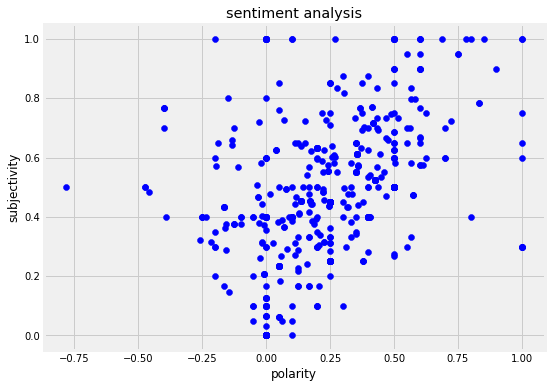

In [201]:
plt.figure(figsize=(8,6))

for i in range(0,tweets.shape[0]):
    plt.scatter(tweets["polarity"][i],tweets["subjectivity"][i],color='blue')

plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()


In [202]:
ptweets=tweets[tweets.Analyse=='Positive']
ptweets=ptweets['text']

per=round((ptweets.shape[0]/tweets.shape[0])*100,1)
print("percentage of the good tweets is "+str(per))

ptweets


percentage of the good tweets is 43.4


0       RT : And that’s why they call it Magic City✨ A...
1       RT : 2012/62 Mercedes Benz SLK55 V8 2dr Conver...
5       It’s good when you follow your dreams. 🌈 It’s ...
9       A custom pink G wagon thats sure to make your ...
12      Did someone say more barnfinds?!Mercedes hears...
                              ...                        
990     I haven’t roared like that for months, it felt...
998     Mercedes CLK GTR Roadster, in legendary black ...
999     Is  vindicated? What does _kidd think about th...
1000    MERCEDES-BENZ GLA180 - 2021 - 40765 km. for mo...
1001    MERCEDES-BENZ R 320 CDI 4 MATIC - 2006 - 20176...
Name: text, Length: 436, dtype: object

In [203]:
ptweets=tweets[tweets.Analyse=='Negative']
ptweets=ptweets['text']

per=round((ptweets.shape[0]/tweets.shape[0])*100,1)
print("percentage of the negative tweets is "+str(per))

ptweets


percentage of the negative tweets is 6.7


2      RT : New helmet design of George Russell for t...
7      Nardo Grey Mercedes G-class with 2019+ G63 Bod...
8      RT : New helmet design of George Russell for t...
10     RT : New helmet design of George Russell for t...
14     RT : Was a pleasure to meet the team at  https...
                             ...                        
786    ElectricVehicles sold in UK passes half a mill...
864    RT : 🚘 • MERCEDES-BENZ ML350📋 • FOREIGN USED🗓 ...
870    Article from February. Only 10/11 races to lat...
974    Is F1 amongst the most dangerous sports in the...
984    "Key complaints related to questionable percei...
Name: text, Length: 67, dtype: object

In [204]:
ptweets=tweets[tweets.Analyse=='Neural']
ptweets=ptweets['text']

per=round((ptweets.shape[0]/tweets.shape[0])*100,1)
print("percentage of the neutral tweets is "+str(per))

ptweets

percentage of the neutral tweets is 50.0


3       RT : Mercedes to use Sila’s silicon anode chem...
4       😎White Maybach S680 4-Matic filmed with Ray-Ba...
6       Mercedes to use Sila’s silicon anode chemistry...
11      RT : Take a gander at this beaut! 😍Introducing...
16      RT : Blue Lions smoochies 💙🦁💋..fe3h FireEmblem...
                              ...                        
996     RT _stx: Summer Mercedes from Fire Emblem, com...
997     Mercedes Benz 300SL Roadster https://t.co/5n7f...
1002    RT _stx: Summer Mercedes from Fire Emblem, com...
1003    RT _stx: Summer Mercedes from Fire Emblem, com...
1004    SELL ME YOUR VOLKSWAGENI buy ALL makes of cars...
Name: text, Length: 502, dtype: object

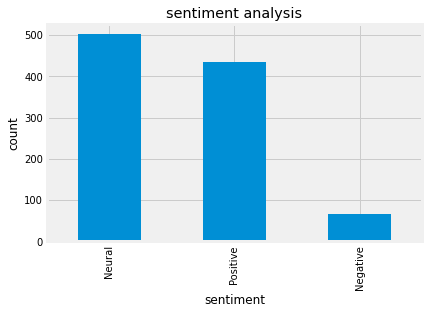

In [205]:
tweets['Analyse'].value_counts()

plt.title("sentiment analysis")
plt.xlabel("sentiment")
plt.ylabel("count")
tweets["Analyse"].value_counts().plot(kind='bar')
plt.show()

In [206]:
user_data.head()

,user id,screen_name,location,is_verified,user name,account creation,followers_count,friends_count,description
0,193774022,biscolf,,False,biscolf atobrah,2010-09-22 17:15:57+00:00,262,4931,
1,1389120063907586049,mystery2no1,æ/æm,False,🪅ⓝi̷c̷𝓗o♌︎𝓪𝔰𝓐𝖓𝔡ᖇ𝑒a⃣§🪨,2021-05-03 07:30:24+00:00,122,510,2̵̰̘̗̏ ̶̘̱̊̎͒͒̎̔̊̍2̵̡̨͖̳͙̤͎̂͗̊͌͜ ̷̡͍͓̫̼̘̍̎̄͂̒͗...
2,199263855,sulfaj_,つづく,False,𝔸²²,2010-10-06 12:46:53+00:00,443,281,"Tetaplah jadi baik, dan hidup.\n#pureffect"
3,27835278,motemotorco,Michigan,False,Mote Motor Company,2009-03-31 08:00:51+00:00,1798,1967,We are an electric car company.
4,39766452,dfwautoclub,DFW Area,False,dfwautoclub,2009-05-13 15:00:37+00:00,262,10,DFW's Luxury & Exotic Auto Community


In [187]:
# save all data in a csv file 

tweets.to_csv("tweets.csv")
